In [1]:
import numpy as np
import sacc
import matplotlib.pyplot as plt
# import seaborn as sns

%matplotlib notebook

In [2]:
# set this to your local analysis ID
ANALYSIS_ID = 'd54188368b814dc9a8b417bf857aed54'

In [25]:
n_src = 4
n_lens = 1

Now lets read the data

In [4]:
des_data = sacc.Sacc.load_fits('/global/homes/c/chihway/txpipe-cosmodc2/firecrown_config/summary_statistics_real.sacc')
fc_data = sacc.Sacc.load_fits('/global/homes/c/chihway/txpipe-cosmodc2/firecrown_config/output_%s/statistics/two_point/sacc_predicted.fits' % ANALYSIS_ID)

# Plot the Redshift Distributions

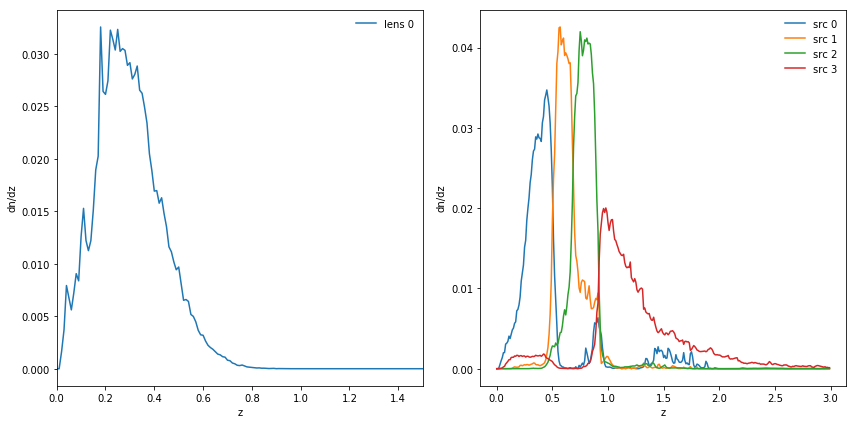

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax = axs[0]
for i in range(n_lens):
    tr = fc_data.get_tracer('lens_%d' % i)
    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='lens %d' % i)

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)
ax.set_xlim(0.0, 1.5)

ax = axs[1]
for i in range(n_src):
    tr = fc_data.get_tracer('source_%d' % i)
    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='src %d' % i)

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)

plt.tight_layout()

# Compare Firecrown to the DES Data for Cosmic Shear

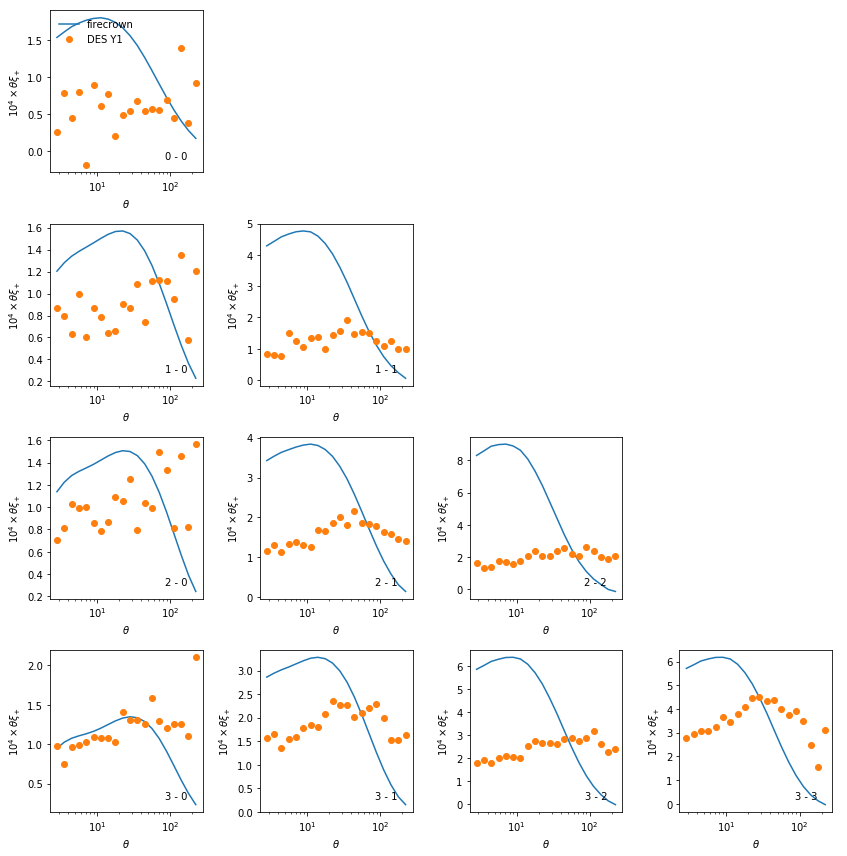

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i < j:
            axs[i, j].axis('off')
            continue
        
        # read in the firecrown
        theta, xip = fc_data.get_theta_xi(
            'galaxy_shear_xi_plus', 
            'source_%d' % i, 
            'source_%d' % j)
        ax = axs[i, j]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        # firecrown
        ax.semilogx(
            theta, 
            fac * xip, 
            label='firecrown')
        
        # des
        theta, xip = des_data.get_theta_xi(
             'galaxy_shear_xi_plus', 
            'source_%d' % i, 
            'source_%d' % j)        
        ax.semilogx(
            theta, 
            fac * xip, 
            'o',
            label='DES Y1')
        
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{+}$')
            
plt.tight_layout()

/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/sacc/sacc.py:342: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you should check the tracer order?")


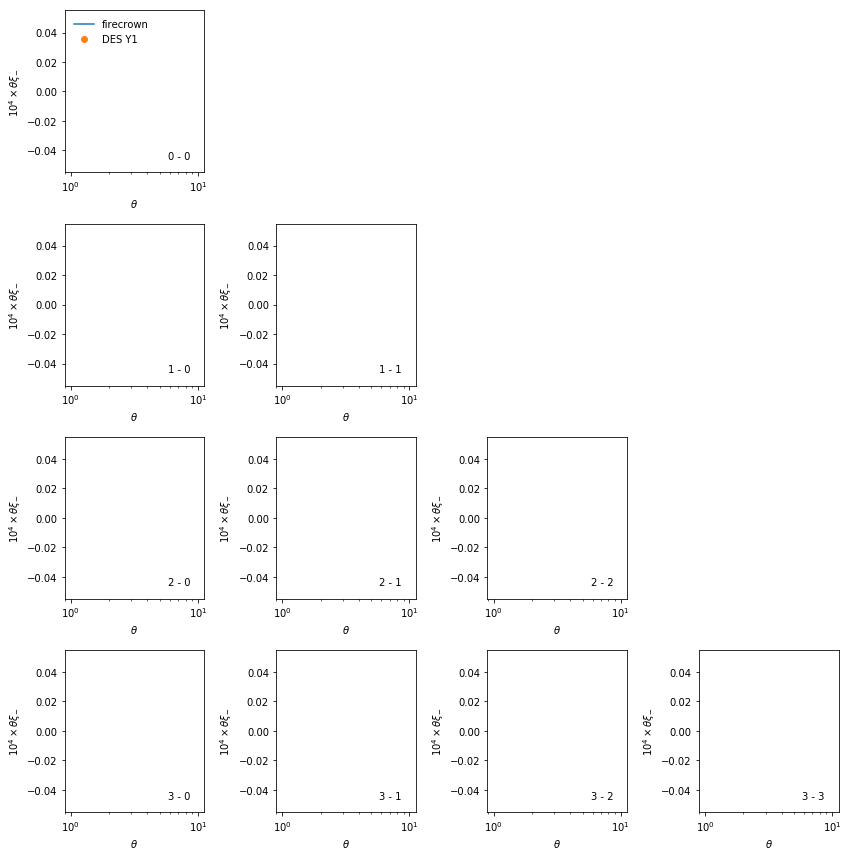

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i < j:
            axs[i, j].axis('off')
            continue
        
        # read in the firecrown
        theta, xim = fc_data.get_theta_xi(
            'galaxy_shear_xi_minus', 
            'source%d' % i, 
            'source%d' % j)
        ax = axs[i, j]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        # firecrown
        ax.semilogx(
            theta, 
            fac * xim, 
            label='firecrown')
        
        # des
        theta, xim = des_data.get_theta_xi(
            'galaxy_shear_xi_minus', 
            'src%d' % i, 
            'src%d' % j)        
        ax.semilogx(
            theta, 
            fac * xim, 
            'o',
            label='DES Y1')
        
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{-}$')
            
plt.tight_layout()

# Compare Firecrown to DES Data for GG Lensing

In [23]:
# fc_data.get_data_points('galaxy_shearDensity_xi_t')

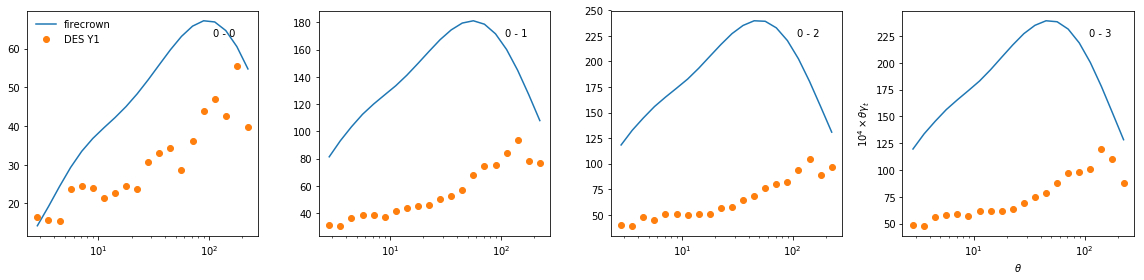

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for lensi in range(n_lens):
    for srcj in range(n_src):
        ax = axs[srcj]

        # read in the firecrown
        theta, xi = fc_data.get_theta_xi(
            'galaxy_shearDensity_xi_t','source_%d' % srcj, 'lens_%d' % lensi)
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        # firecrown
        ax.semilogx(
            theta, 
            fac * xi,
            label='firecrown')

        theta, xi = des_data.get_theta_xi(
            'galaxy_shearDensity_xi_t','source_%d' % srcj, 'lens_%d' % lensi )
        
        ax.semilogx(
            theta, 
            fac * xi,
            'o',
            label='DES Y1')
    
        if lensi == 0 and srcj == 0:
            ax.legend(loc=2, frameon=False)

        ax.text(
            0.9, 0.9, '%d - %d' % (lensi, srcj), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$10^{4}\times\theta\gamma_{t}$')
            
plt.tight_layout()

# Compare Firecrown to DES Data for Clustering

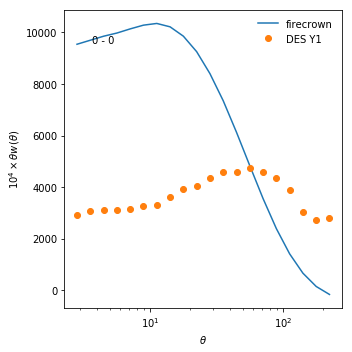

In [35]:
# get loc excluding cosmic shear and gg lensing
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# axs = axs.ravel()
# axs[-1].axis('off')
for i in range(n_lens):
    ax = axs #[i]

    # read in the firecrown values
    theta, xi = fc_data.get_theta_xi(
        'galaxy_density_xi',
        'lens_%d' % i,
        'lens_%d' % i)
        
    # this is a factor of 10^4 x theta to take out the dynamic range
    fac = 1e4 * theta
        
    # firecrown
    ax.semilogx(
        theta, 
        (fac * xi),
        label='firecrown')
        
    # des
    theta, xi = des_data.get_theta_xi(
        'galaxy_density_xi',
        'lens_%d' % i,
        'lens_%d' % i)
    
    ax.semilogx(
        theta, 
        (fac * xi), 
        'o',
        label='DES Y1')
    
    if i == 0:
        ax.legend(loc=1, frameon=False)
        
    ax.text(
        0.1, 0.9, '%d - %d' % (i, i), 
        horizontalalignment='left',
        verticalalignment='center', 
        transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$10^{4}\times\theta w(\theta)$')
            
plt.tight_layout()

## Plot the Chains

In [10]:
import pandas as pd
import corner

chains = pd.read_csv('/global/homes/c/chihway/txpipe-cosmodc2/firecrown_config/output_%s/analysis.csv' % ANALYSIS_ID)
chains['Omega_m'] = chains['Omega_c'] + 0.0485

In [11]:
print(chains[:3])

     sigma8   Omega_c        A0  eta_ia  src0_mult_bias  src1_mult_bias  \
0  0.791893  0.270844  0.490591    0.01            0.01            0.01   
1  0.791893  0.270844  0.490591    0.01            0.01            0.01   
2  0.791893  0.270844  0.490591    0.01            0.01            0.01   

   src2_mult_bias  src3_mult_bias  bias_lens0  src0_delta_z  src1_delta_z  \
0            0.01            0.01    1.448232     -0.000892     -0.020734   
1            0.01            0.01    1.448232     -0.000892     -0.020734   
2            0.01            0.01    1.448232     -0.000892     -0.020734   

   src2_delta_z  src3_delta_z  lens0_delta_z  emcee_walker  mcmc_step  \
0      0.008465      -0.01799       0.001075             0          0   
1      0.008465      -0.01799       0.001075             0          1   
2      0.008465      -0.01799       0.001075             0          2   

        loglike   Omega_m  
0 -2.345289e+06  0.319344  
1 -2.345289e+06  0.319344  
2 -2.345289e+

In [12]:
msk = chains.mcmc_step > 750

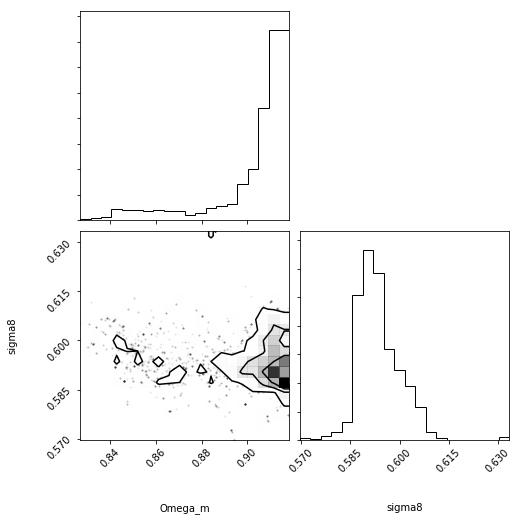

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig = corner.corner(
    chains.loc[msk, ['Omega_m', 'sigma8']].to_numpy(),
    labels=['Omega_m', 'sigma8'],
    fig=fig)

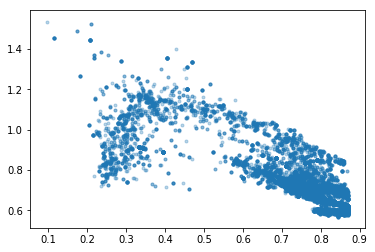

In [14]:
plt.scatter(chains['Omega_c'], chains['sigma8'], marker='.', alpha=0.3)